In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor
from sklearn.

In [14]:
# 加载数据
data=load_boston()
# 分割数据
#random_state：代表随机数种子的设置
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)
# 使用 AdaBoost 回归模型
regressor=AdaBoostRegressor()
regressor.fit(train_x,train_y)
pred_y = regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print(" 房价预测结果 ", pred_y)
print(" 均方误差 = ",round(mse,2))

 房价预测结果  [20.4254902  11.14363636 13.71333333 16.89106145 24.72277778 21.33496503
 29.57572816 17.23333333 28.         20.9494382  29.99666667 33.99518072
 11.89756098 24.72277778 13.06507937 25.16105263 16.7375     16.7375
 27.72376682 25.66382979 17.04545455 17.04545455 17.04545455 19.52037037
 31.45657895 18.07142857 22.335      24.72277778 12.0047619  29.99666667
 16.89106145 26.4127907  10.69666667 21.33496503 26.28132296 31.15833333
 25.95202703 11.86984127 15.60952381 25.87513514 14.14285714 12.58
 28.453125   16.98579545 26.63529412 19.52037037 17.76540541 18.53019802
 26.4127907  19.52037037 16.89106145 33.73571429 16.3025974  16.7375
 25.87513514 21.05306122 25.76078431 16.41333333 25.66382979 22.46694915
 18.5        16.7375     43.62222222 21.33496503 16.89106145 26.28132296
 25.76078431 11.86984127 18.09444444 28.453125   22.7746988  18.49382716
 17.         27.13955224 19.52037037 44.66666667 16.06530612 11.86984127
 17.40689655 24.52928177 20.9494382  14.9        12.1986

In [18]:
# 使用决策树回归模型
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

dec_regressor=DecisionTreeRegressor()
dec_regressor.fit(train_x,train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print(" 决策树均方误差 = ",round(mse,2))

# 使用 KNN 回归模型
knn_regressor=KNeighborsRegressor()
knn_regressor.fit(train_x,train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("KNN 均方误差 = ",round(mse,2))

 决策树均方误差 =  25.61
KNN 均方误差 =  27.87


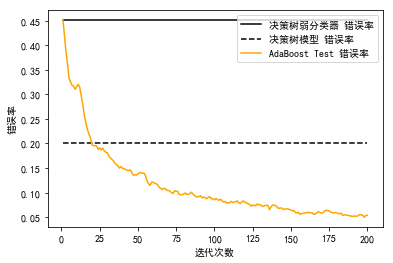

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier
# 设置 AdaBoost 迭代次数
n_estimators = 200

X,y = datasets.make_hastie_10_2(n_samples=12000,random_state=1)
# 从 12000 个数据中取前 2000 行作为测试集，其余作为训练集
test_x, test_y = X[:2000],y[:2000]
train_x, train_y = X[2000:],y[2000:]
# 弱分类器 - 决策树分类器
# 基于单层决策树构建弱分类器 boosting分类
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)
# AdaBoost 分类器
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)

# 三个分类器的错误率可视化
fig = plt.figure()
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
#111”表示“1×1网格，第一子图
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err] * 2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err] * 2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
# 遍历每次迭代的结果 i 为迭代次数, pred_y 为预测结果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 统计错误率
    ada_err[i]=zero_one_loss(pred_y, test_y)
# 绘制每次迭代的 AdaBoost 错误率 
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()